In [ ]:
import yfinance as yf
import pandas as pd

In [3]:
def fetch_stock_data(stock_file, period="1y", interval="1d"):


    # Read stock tickers from file
    try:
        with open(stock_file, "r") as f:
            tickers = [line.strip() for line in f.readlines()]
    except FileNotFoundError:
        print(f"Error: {stock_file} not found.")
        return

    # Fetch and save data for each stock
    for ticker in tickers:
        print(f"Fetching data for {ticker}...")

        stock = yf.Ticker(ticker)
        data = stock.history(period=period)

        if data.empty:
            print(f"Warning: No data found for {ticker}. Skipping...")
            continue

        # Ensure we have at least 4000 data points
        if len(data) < 4000:
            print(f"Warning: Only {len(data)} records found for {ticker}. Consider a longer period.")
        
        # Add a column for the stock ticker
        data["Ticker"] = ticker

        # Save the data to a CSV file named after the stock
        filename = f"{ticker}.csv"
        data.to_csv(filename)
        
        print(f"Data saved successfully in {filename}")

# Example usage
fetch_stock_data("stocks.txt")

Fetching data for AAPL...
Data saved successfully in AAPL.csv
Fetching data for MSFT...
Data saved successfully in MSFT.csv
Fetching data for GOOGL...
Data saved successfully in GOOGL.csv
Fetching data for ^GSPC...
Data saved successfully in ^GSPC.csv


In [38]:
df = pd.read_csv("AAPL.csv", index_col="Date", parse_dates=True)

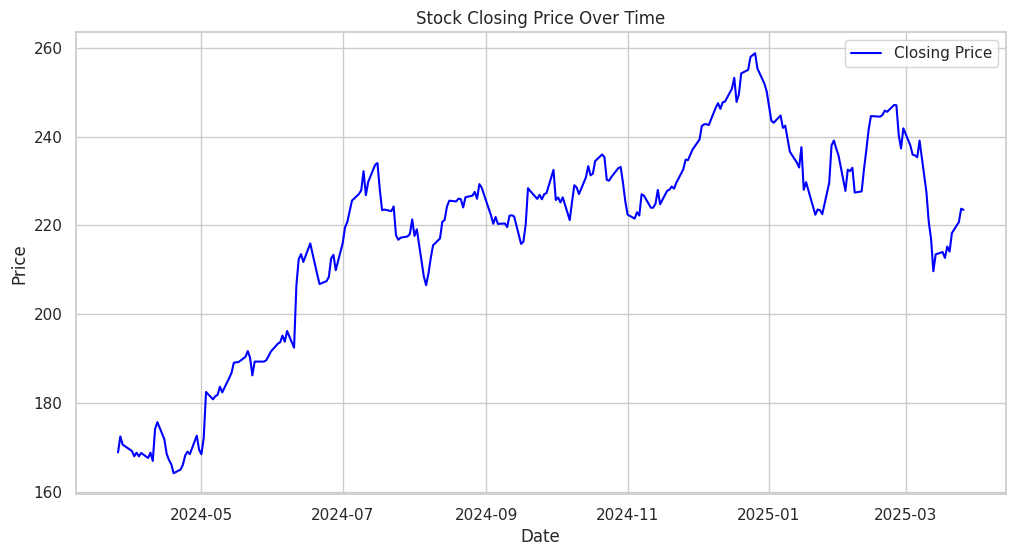

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot Closing Price
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Closing Price", color="blue")
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


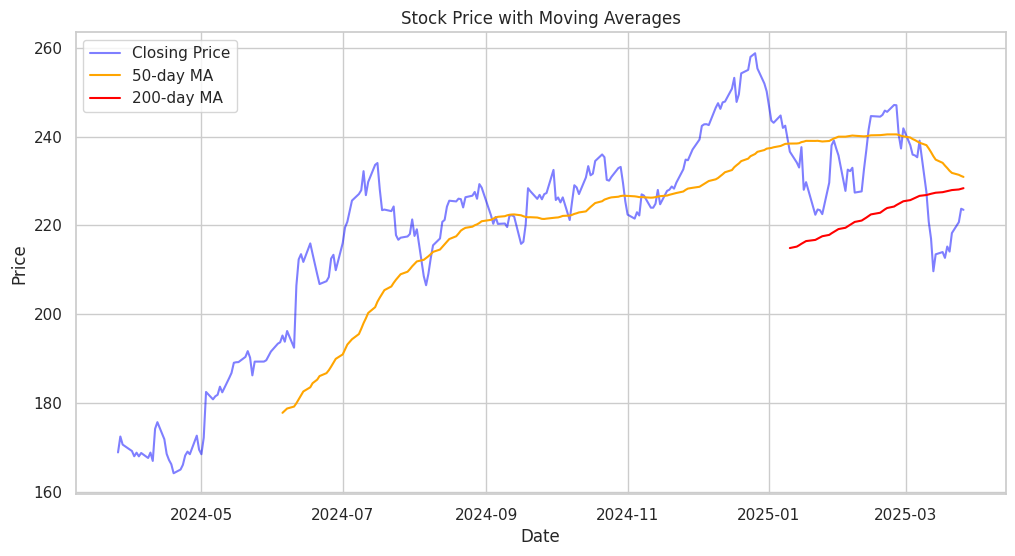

In [40]:
df["50_MA"] = df["Close"].rolling(window=50).mean()
df["200_MA"] = df["Close"].rolling(window=200).mean()

# Plot Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Closing Price", color="blue", alpha=0.5)
plt.plot(df.index, df["50_MA"], label="50-day MA", color="orange")
plt.plot(df.index, df["200_MA"], label="200-day MA", color="red")
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


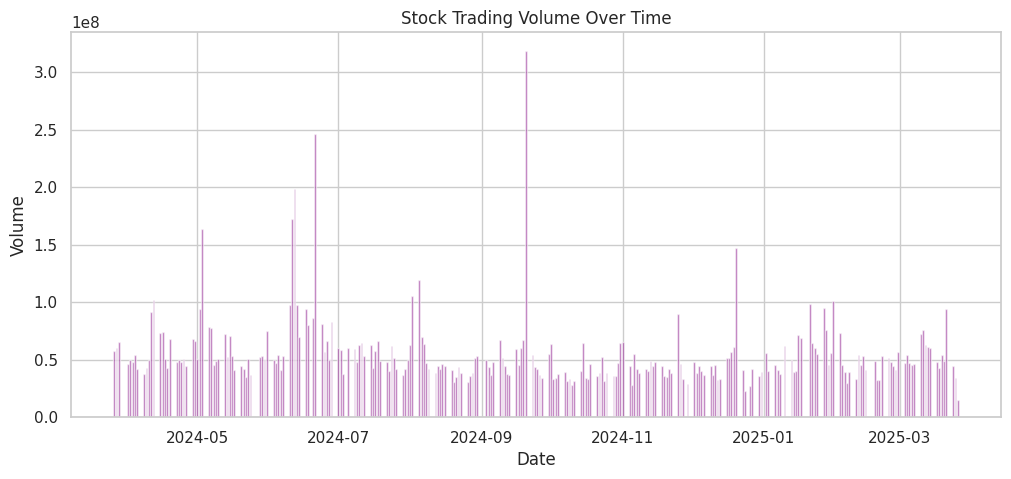

In [41]:
plt.figure(figsize=(12, 5))
plt.bar(df.index, df["Volume"], color="purple", alpha=0.6)
plt.title("Stock Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


In [42]:
import numpy as np

def identify_trend(data):
    data["Trend"] = np.where(data["Close"] > data["Close"].shift(1), "Up", "Down")
    print(data[["Close", "Trend"]].tail(10))  # Print last 10 records

# Load stock data
df = pd.read_csv("AAPL.csv", index_col="Date", parse_dates=True)

# Identify trend
identify_trend(df)


                                Close Trend
Date                                       
2025-03-13 00:00:00-04:00  209.679993  Down
2025-03-14 00:00:00-04:00  213.490005    Up
2025-03-17 00:00:00-04:00  214.000000    Up
2025-03-18 00:00:00-04:00  212.690002  Down
2025-03-19 00:00:00-04:00  215.240005    Up
2025-03-20 00:00:00-04:00  214.100006  Down
2025-03-21 00:00:00-04:00  218.270004    Up
2025-03-24 00:00:00-04:00  220.729996    Up
2025-03-25 00:00:00-04:00  223.750000    Up
2025-03-26 00:00:00-04:00  223.500000  Down


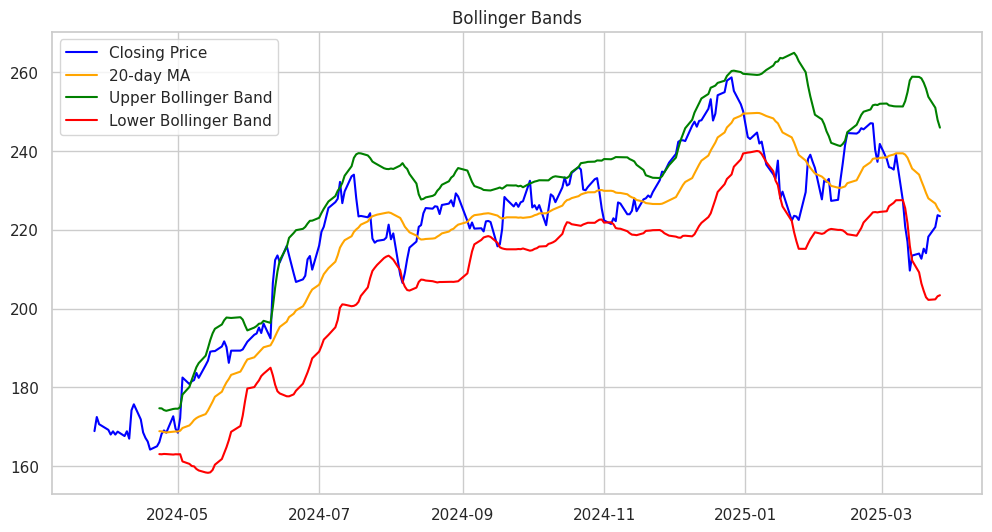

In [43]:
import matplotlib.pyplot as plt

# Calculate Bollinger Bands
df["20_MA"] = df["Close"].rolling(window=20).mean()
df["Upper_Band"] = df["20_MA"] + (df["Close"].rolling(window=20).std() * 2)
df["Lower_Band"] = df["20_MA"] - (df["Close"].rolling(window=20).std() * 2)

# Plot Bollinger Bands
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Close"], label="Closing Price", color="blue")
plt.plot(df.index, df["20_MA"], label="20-day MA", color="orange")
plt.plot(df.index, df["Upper_Band"], label="Upper Bollinger Band", color="green")
plt.plot(df.index, df["Lower_Band"], label="Lower Bollinger Band", color="red")
plt.legend()
plt.title("Bollinger Bands")
plt.show()


In [6]:
import requests
import yfinance as yf
import pandas as pd
import time
from bs4 import BeautifulSoup
import csv

def fetch_news_headline(ticker, date):
    """Fetch a single news headline for a given stock and date."""
    url = f"https://finance.yahoo.com/quote/{ticker}/news/"
    
    headers = {
        "User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/109.0"
    }
    
    try:
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f"Failed to fetch news for {ticker} on {date}. Status: {response.status_code}")
            return "No News Available"

        soup = BeautifulSoup(response.content, "html.parser")
        headlines = soup.find_all("h3")

        if headlines:
            return headlines[0].get_text(strip=True)  # Get the first headline
        else:
            return "No News Available"

    except Exception as e:
        print(f"Error fetching news for {ticker} on {date}: {e}")
        return "No News Available"

def fetch_stock_data(stock_file, period="1y", interval="1d"):
    """Fetch stock data and news headlines, saving them in separate files."""
    
    # Read stock tickers from file
    try:
        with open(stock_file, "r") as f:
            tickers = [line.strip() for line in f.readlines()]
    except FileNotFoundError:
        print(f"Error: {stock_file} not found.")
        return

    for ticker in tickers:
        print(f"Fetching data for {ticker}...")

        # Fetch stock price data
        stock = yf.Ticker(ticker)
        data = stock.history(period=period, interval=interval)

        if data.empty:
            print(f"Warning: No data found for {ticker}. Skipping...")
            continue

        # Ensure we have enough data
        if len(data) < 50:  # Reduce from 4000 to make it reasonable
            print(f"Warning: Only {len(data)} records found for {ticker}. Consider a longer period.")
        
        # Add Ticker column
        data["Ticker"] = ticker

        # Fetch and add news headlines per date
        news_data = []
        news_dict = {}

        for date in data.index:
            date_str = date.strftime("%Y-%m-%d")  # Format date properly
            
            if date_str not in news_dict:
                news_headline = fetch_news_headline(ticker, date_str)
                news_dict[date_str] = news_headline  # Store to avoid duplicate requests
            
            news_data.append(news_dict[date_str])

            # Wait to avoid being blocked
            time.sleep(2)

        # Add news column to the dataframe
        data["News"] = news_data

        # Save stock data with news
        stock_filename = f"{ticker}_stock_with_news.csv"
        data.to_csv(stock_filename)
        print(f"Data saved in {stock_filename}")

        # Save news separately
        news_df = pd.DataFrame({"Date": data.index.strftime("%Y-%m-%d"), "Ticker": ticker, "News": news_data})
        news_filename = f"{ticker}_news.csv"
        news_df.to_csv(news_filename, index=False)
        print(f"News saved in {news_filename}")

# Example usage:
# fetch_stock_data("stocks.txt")
